In [5]:
from time import time

import cv2
import matplotlib.pyplot as plt
import numpy as np

def auto_crop(file_name):
    """
    Input argument: file_name (Image file name, e.g., 'rose.tif')
    
    This function will auto crop the given image using image processing technique
    
    Output: ROI
    """
    # Start timer
    start_time = time()
    # Read an image
    img = cv2.imread(file_name, cv2.IMREAD_UNCHANGED)
    height = img.shape[0]
    width = img.shape[1]
    # Check image is grayscale or not 
    if len(img.shape) == 2:
        gray_img = img.copy()
    else:
        # Convert bgr image to grayscale image
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # To find upper threshold, we need to apply Otsu's thresholding
    upper_thresh, thresh_img = cv2.threshold(gray_img, thresh=0, maxval=255, type=cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Calculate lower threshold
    lower_thresh = 0.5*upper_thresh
    # Apply canny edge detection
    canny = cv2.Canny(img, lower_thresh, upper_thresh)
    # Finding the non-zero points of canny
    pts = np.argwhere(canny>0)
    # Finding the min and max points
    y1,x1 = pts.min(axis=0)
    y2,x2 = pts.max(axis=0)
    # Crop ROI from the givn image
    roi_img = img[y1:y2, x1:x2]
    # Printing image dimensions, execution time
    print(f'Original image dimensions: {width}x{height}')
    print(f'Execution time: {time()-start_time} sec')
    # Display images
    fig = plt.figure()
    fig.suptitle('Auto Cropping using Canny Edge Detection', fontsize=16)
    fig.add_subplot(1,3, 1).set_title('Orginal image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    fig.add_subplot(1,3, 2).set_title('Apply canny edge detection')
    plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
    fig.add_subplot(1,3, 3).set_title('ROI')
    plt.imshow(cv2.cvtColor(roi_img, cv2.COLOR_BGR2RGB))
    plt.show()

    return roi_img


def image_attributes(img):
    """
    Input argument: img (Opencv mat)
    
    This function will display the following image attributes:
    - Height and Width
    - Color Channel
    - DPI
    - Max/Min/Average Intensity Values

    Output: image attributes
    """
    height = img.shape[0]
    width = img.shape[1]
    if len(img.shape) == 2:
        no_of_channels = 1
    else:
        no_of_channels = img.shape[2]
    bit_depth = no_of_channels*8
    storage_size = int((height*width*bit_depth)/8)
    # Calculate intensity value
    min_intensity = img.min(axis=0).min(axis=0)
    max_intensity = img.max(axis=0).max(axis=0)
    average_intensity = img.mean(axis=0).mean(axis=0).astype(int)

    print(f'- Image dimensions: {width}x{height}')
    print(f'- Height (rows): {height} pixels')
    print(f'- Width (columns): {width} pixels')
    print(f'- No. of pixels: {height*width}')
    print(f'- Color channels: {no_of_channels}')
    print(f'- Bit depth: {bit_depth}')
    print(f'- Storage size (without compression)): {storage_size} bytes')
    print('- Intensity Values')
    if no_of_channels == 1:
        print(f'\tMin Intensity: {min_intensity}')
        print(f'\tMax Intensity: {max_intensity}')
        print(f'\tAverage Intensity: {average_intensity}')
    elif no_of_channels == 3:
        print(f'\tMin Intensity (Blue): {min_intensity[0]}')
        print(f'\tMax Intensity (Blue): {max_intensity[0]}')
        print(f'\tAverage Intensity (Blue): {average_intensity[0]}')
        print(f'\tMin Intensity (Green): {min_intensity[1]}')
        print(f'\tMax Intensity (Green) {max_intensity[1]}')
        print(f'\tAverage Intensity (Green): {average_intensity[1]}')
        print(f'\tMin Intensity (Red): {min_intensity[2]}')
        print(f'\tMax Intensity (Red) {max_intensity[2]}')
        print(f'\tAverage Intensity (Red): {average_intensity[2]}')


def image_features(img):
    """
    Input argument: img (Opencv mat)
    
    This function will display the following image features:
    - Edges 
    - Corners / interest points
    - Blobs / regions of interest points
    - Ridges

    Output: display image features
    """
    # Apply canny edge detection
    canny_img = cv2.Canny(img, 50, 200)
    # Check image is grayscale or not 
    if len(img.shape) == 2:
        gray_img = img.copy()
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    else:
        # Convert bgr image to grayscale image
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Get heatmap image
    heatmap_img = cv2.applyColorMap(gray_img, cv2.COLORMAP_JET)

    # Corners detection
    corner_img = img.copy()
    gray_img_float = np.float32(gray_img)
    dst = cv2.cornerHarris(gray_img_float,2,3,0.04)
    dst = cv2.dilate(dst, None)
    # Threshold for an optimal value
    corner_img[dst>0.01*dst.max()]=[0,0,255]

    ridge_filter = cv2.ximgproc.RidgeDetectionFilter_create()
    ridges_img = ridge_filter.getRidgeFilteredImage(img)
    
    histogram = cv2.calcHist(gray_img, [0], None, [256], [0, 256])
    
     # SIFT feature extraction
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)
    sift_img = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    
     # ORB feature extraction
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)
    orb_img = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


    # Display image features
    fig = plt.figure()
    fig.suptitle('Image Features', fontsize=16)
    
    fig.add_subplot(2,2, 1).set_title('Edges')
    plt.imshow(cv2.cvtColor(canny_img, cv2.COLOR_BGR2RGB))
    
    fig.add_subplot(2,2, 2).set_title('Corners')
    plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))

    fig.add_subplot(2,2, 3).set_title('Ridges')
    plt.imshow(cv2.cvtColor(ridges_img, cv2.COLOR_BGR2RGB))
    
    fig.add_subplot(2,2, 4).set_title('Heatmap')
    plt.imshow(cv2.cvtColor(heatmap_img, cv2.COLOR_BGR2RGB))
  
    plt.show()
    
     # Display image features
    fig2 = plt.figure()
    fig2.suptitle('More Image Features', fontsize=16)
    
    fig2.add_subplot(2, 2, 1).set_title('Histogram')
    plt.plot(histogram, color='black')
    
    fig2.add_subplot(2, 2, 2).set_title('SIFT Keypoints')
    plt.imshow(cv2.cvtColor(sift_img, cv2.COLOR_BGR2RGB))
    
    fig2.add_subplot(2, 2, 3).set_title('ORB Keypoints')
    plt.imshow(cv2.cvtColor(orb_img, cv2.COLOR_BGR2RGB))
    plt.show()
    


Original image dimensions: 696x392
Execution time: 0.10914254188537598 sec


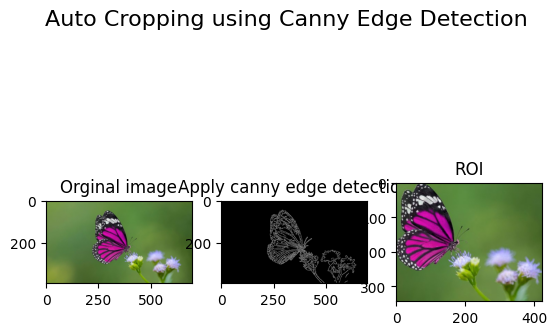

ROI attributes:-
- Image dimensions: 423x344
- Height (rows): 344 pixels
- Width (columns): 423 pixels
- No. of pixels: 145512
- Color channels: 3
- Bit depth: 24
- Storage size (without compression)): 436536 bytes
- Intensity Values
	Min Intensity (Blue): 0
	Max Intensity (Blue): 255
	Average Intensity (Blue): 77
	Min Intensity (Green): 0
	Max Intensity (Green) 255
	Average Intensity (Green): 114
	Min Intensity (Red): 0
	Max Intensity (Red) 255
	Average Intensity (Red): 101


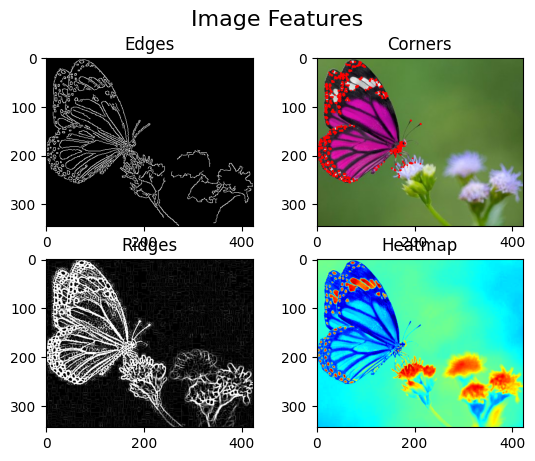

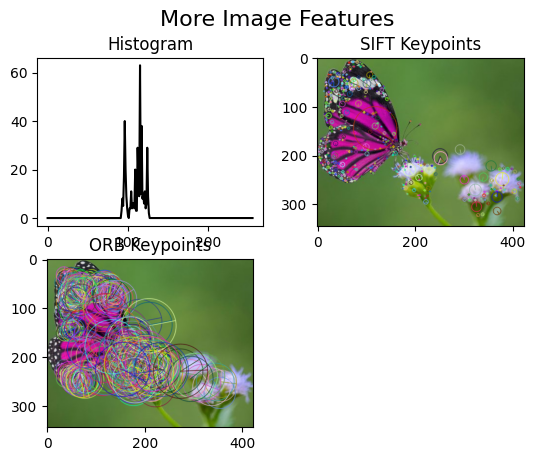

In [2]:
file_name = 'butterfly.jpg'
roi_img = auto_crop(file_name)
print('ROI attributes:-')
image_attributes(roi_img)
image_features(roi_img)

Original image dimensions: 238x212
Execution time: 0.044069528579711914 sec


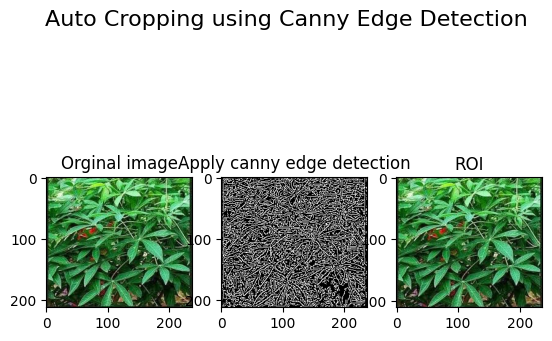

ROI attributes:-
- Image dimensions: 237x211
- Height (rows): 211 pixels
- Width (columns): 237 pixels
- No. of pixels: 50007
- Color channels: 3
- Bit depth: 24
- Storage size (without compression)): 150021 bytes
- Intensity Values
	Min Intensity (Blue): 0
	Max Intensity (Blue): 236
	Average Intensity (Blue): 62
	Min Intensity (Green): 0
	Max Intensity (Green) 255
	Average Intensity (Green): 116
	Min Intensity (Red): 0
	Max Intensity (Red) 253
	Average Intensity (Red): 58


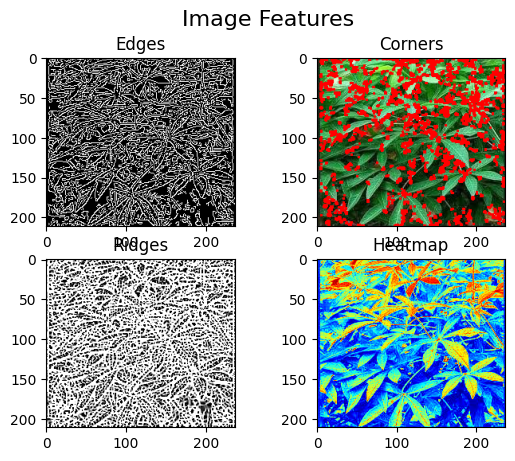

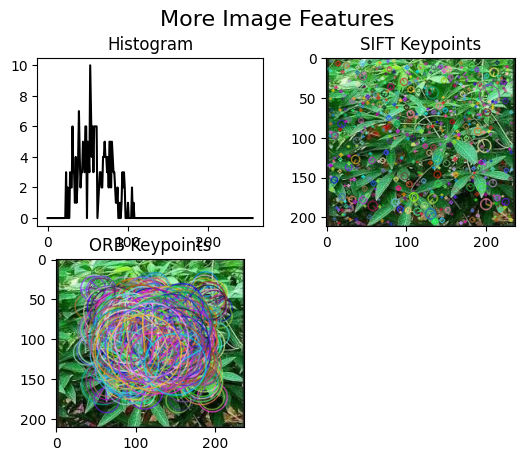

In [3]:
file_name = 'cassava86.jpg'
roi_img = auto_crop(file_name)
print('ROI attributes:-')
image_attributes(roi_img)
image_features(roi_img)

Original image dimensions: 1140x1520
Execution time: 0.17866230010986328 sec


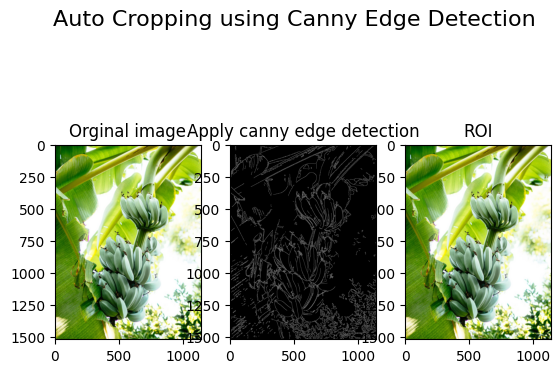

ROI attributes:-
- Image dimensions: 1139x1519
- Height (rows): 1519 pixels
- Width (columns): 1139 pixels
- No. of pixels: 1730141
- Color channels: 3
- Bit depth: 24
- Storage size (without compression)): 5190423 bytes
- Intensity Values
	Min Intensity (Blue): 0
	Max Intensity (Blue): 255
	Average Intensity (Blue): 106
	Min Intensity (Green): 0
	Max Intensity (Green) 255
	Average Intensity (Green): 179
	Min Intensity (Red): 0
	Max Intensity (Red) 255
	Average Intensity (Red): 151


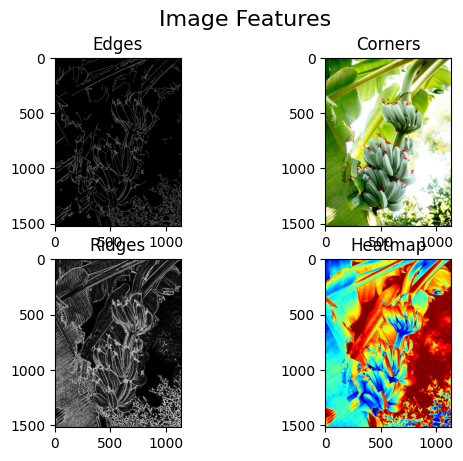

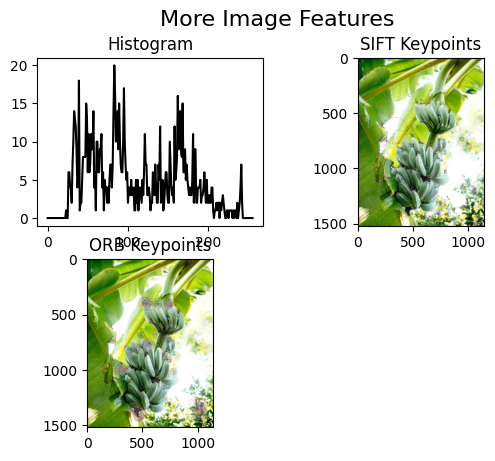

In [4]:
file_name = 'banana27.jpg'
roi_img = auto_crop(file_name)
print('ROI attributes:-')
image_attributes(roi_img)
image_features(roi_img)

# Working on Images generated from Video

Original image dimensions: 708x1110
Execution time: 0.10336661338806152 sec


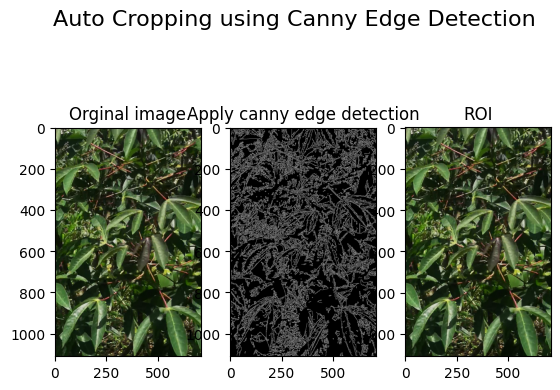

ROI attributes:-
- Image dimensions: 707x1109
- Height (rows): 1109 pixels
- Width (columns): 707 pixels
- No. of pixels: 784063
- Color channels: 3
- Bit depth: 24
- Storage size (without compression)): 2352189 bytes
- Intensity Values
	Min Intensity (Blue): 0
	Max Intensity (Blue): 255
	Average Intensity (Blue): 42
	Min Intensity (Green): 0
	Max Intensity (Green) 255
	Average Intensity (Green): 75
	Min Intensity (Red): 0
	Max Intensity (Red) 255
	Average Intensity (Red): 60


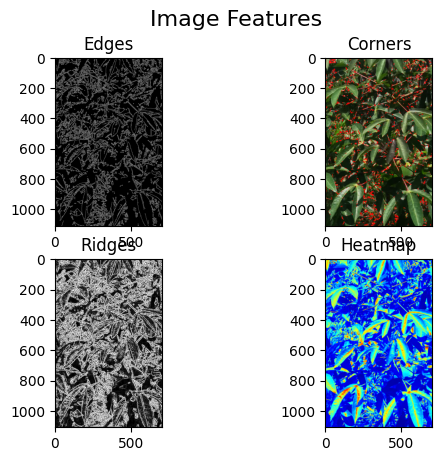

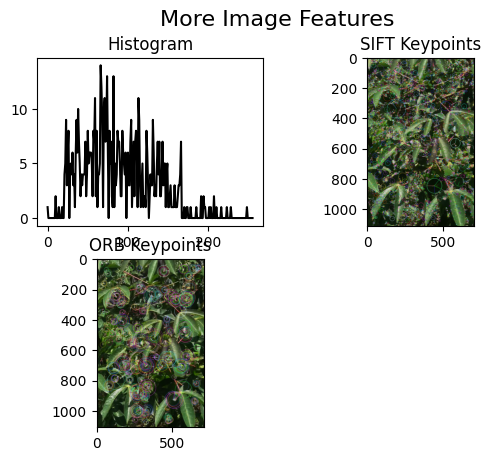

In [3]:
file_name = 'data\Cassava\garden_image_127_2.png'
roi_img = auto_crop(file_name)
print('ROI attributes:-')
image_attributes(roi_img)
image_features(roi_img)

In [7]:
def image_features_SIFT(img):
    """
    Input argument: img (Opencv mat)
    
    This function will display the following image features:
    - Edges 
    - Corners / interest points
    - Blobs / regions of interest points
    - Ridges

    Output: display image features
    """
    # Apply canny edge detection
    canny_img = cv2.Canny(img, 50, 200)
    # Check image is grayscale or not 
    if len(img.shape) == 2:
        gray_img = img.copy()
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    else:
        # Convert bgr image to grayscale image
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
     # SIFT feature extraction
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)
    sift_img = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    return keypoints, descriptors 
    

# Starting on ML model

In [8]:
import os
import cv2
# Prepare your dataset directory
dataset_dir = 'data'
class_labels = ['Cassava', 'corn', 'sugarcane']  # List of class labels

# Initialize empty lists for features and labels
features_list = []
labels_list = []

# Iterate through the dataset directory
for class_label in class_labels:
    class_dir = os.path.join(dataset_dir, class_label)
    image_files = os.listdir(class_dir)

    # Iterate through the images in the class directory
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)

        # Read the image
        image = cv2.imread(image_path)

        # Extract SIFT features from the image
        keypoints, descriptors = image_features_SIFT(image)

        # Append the features and corresponding label to the lists
        features_list.append(descriptors)
        labels_list.append(class_label)

# Convert the features and labels lists to NumPy arrays
features_array = np.array(features_list)
labels_array = np.array(labels_list)

# Print the shape of the features and labels arrays
print("Features shape:", features_array.shape)
print("Labels shape:", labels_array.shape)

# Now you have your training dataset with SIFT features and labels
# You can proceed to preprocess the data and train your machine learning model
# Use the features_array as the input and labels_array as the target variable
# Remember to split the dataset into training and validation sets if necessary
# Train your model using the training set and evaluate its performance

Features shape: (88,)
Labels shape: (88,)


C:\Users\josep\AppData\Local\Temp\ipykernel_21032\2559638708.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  features_array = np.array(features_list)


In [12]:
max_num_features = max(features.shape[0] for features in features_array)

# Pad or truncate the features of each image to match the maximum number of features
padded_features_list = []
for features in features_array:
    num_features = features.shape[0]
    if num_features < max_num_features:
        padded_features = np.pad(features, ((0, max_num_features - num_features), (0, 0)), mode='constant')
    elif num_features > max_num_features:
        padded_features = features[:max_num_features, :]
    else:
        padded_features = features
    padded_features_list.append(padded_features)

# Convert the padded features list to a NumPy array
reshaped_features = np.array(padded_features_list)

# Reshape the features array to have the shape (88, num_features)
reshaped_features = reshaped_features.reshape((reshaped_features.shape[0], -1))


# Training KNN model

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.decomposition import PCA

In [17]:
# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=50)  # Adjust the number of components as needed
features_pca = pca.fit_transform(reshaped_features)

In [25]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_pca, labels_array, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2777777777777778


In [23]:
import pickle

In [24]:
# Save the model
with open('Garden_monitoring_knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)